<a href="https://colab.research.google.com/github/alanmoralesrz/AI-Class/blob/main/IA_PIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Artificial intelligence project**

* Alan Dario Morales Rodriguez







# **Loading Data**

In [ ]:
!pip install -q kaggle
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d uraninjo/augmented-alzheimer-mri-dataset
! unzip /content/augmented-alzheimer-mri-dataset.zip

In [ ]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/AugmentedAlzheimerDataset')

Found 33984 files belonging to 4 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()


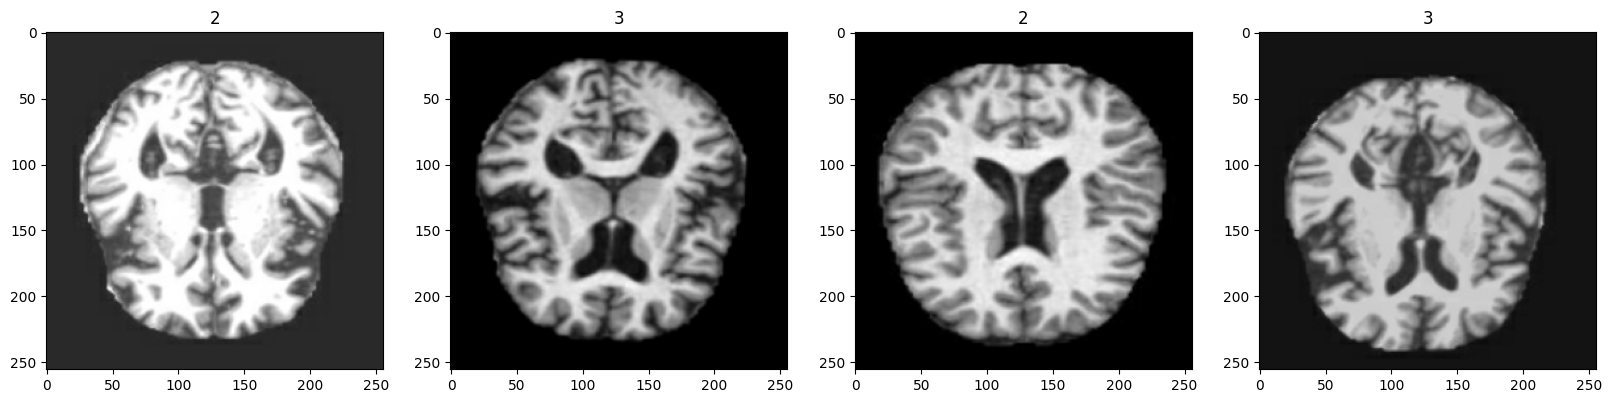

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# **Preprocessing Data**

In [ ]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# **Building the convolutional neural network**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [ ]:
model.compile('adam', loss=tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# **Train**

In [ ]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

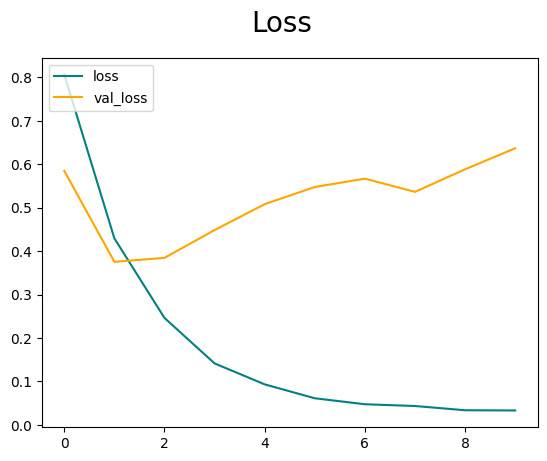

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

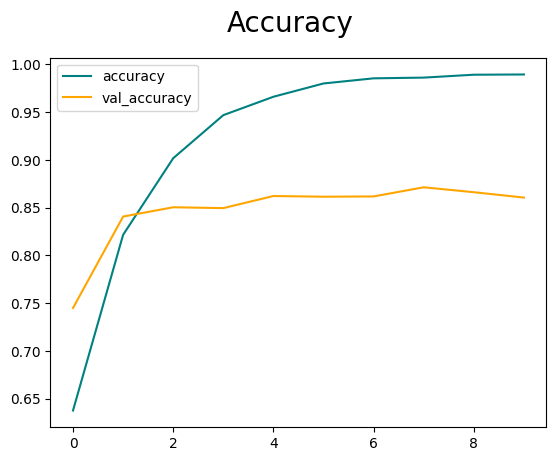

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)

    y = tf.one_hot(y, depth=4)
    
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(pre.result(), re.result(), acc.result())

In [ ]:
import cv2

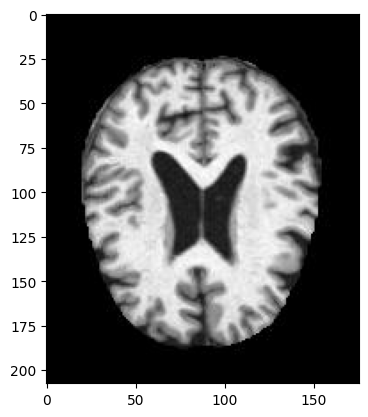

In [ ]:
img = cv2.imread('/content/OriginalDataset/VeryMildDemented/26 (50).jpg')
plt.imshow(img)
plt.show()

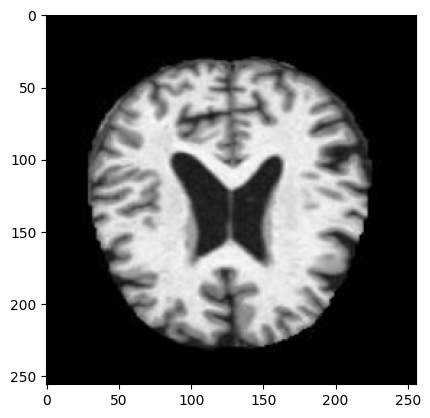

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))
predicted_class = np.argmax(yhat) 
if predicted_class == 0:
    print(f'Predicted class is Category Mild Demented')
elif predicted_class == 1:
    print(f'Predicted class is Category Moderate Demented')
elif predicted_class == 2:
    print(f'Predicted class is Category Non Demented')
else:
    print(f'Predicted class is Category Very Mild Demented')

1/1 [==============================] - 0s 38ms/step
Predicted class is Category Very Mild Demented


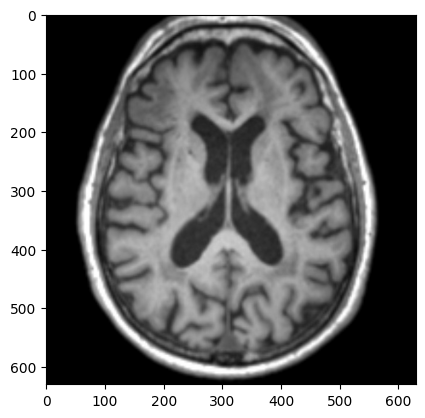

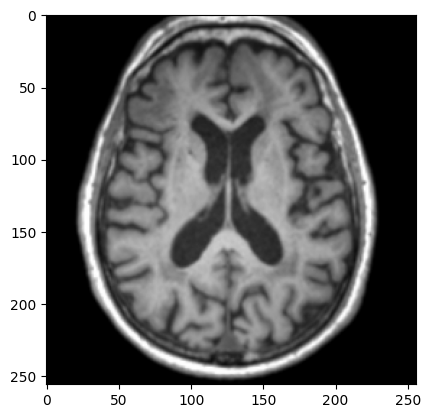

1/1 [==============================] - 0s 66ms/step
Predicted class is Category Very Mild Demented


In [ ]:
img = cv2.imread('/content/short term memory.jpeg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = model.predict(np.expand_dims(resize/255, 0))
predicted_class = np.argmax(yhat) 
if predicted_class == 0:
    print(f'Predicted class is Category Mild Demented')
elif predicted_class == 1:
    print(f'Predicted class is Category Moderate Demented')
elif predicted_class == 2:
    print(f'Predicted class is Category Non Demented')
else:
    print(f'Predicted class is Category Very Mild Demented')

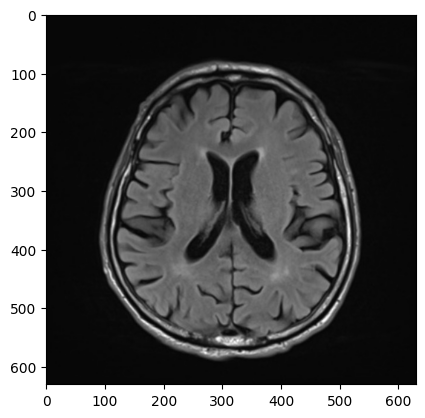

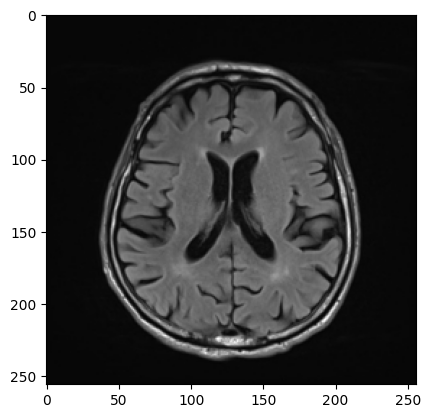

1/1 [==============================] - 0s 58ms/step
Predicted class is Category Mild Demented


In [ ]:
img = cv2.imread('/content/Memory problems.jpeg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = model.predict(np.expand_dims(resize/255, 0))
predicted_class = np.argmax(yhat) 
if predicted_class == 0:
    print(f'Predicted class is Category Mild Demented')
elif predicted_class == 1:
    print(f'Predicted class is Category Moderate Demented')
elif predicted_class == 2:
    print(f'Predicted class is Category Non Demented')
else:
    print(f'Predicted class is Category Very Mild Demented')